In [1]:
import pandas as pd

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz
!tar xf spark-3.2.0-bin-hadoop3.2.tgz
!pip install -q findspark

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "spark-3.2.0-bin-hadoop3.2"

In [4]:
import findspark
findspark.init()


In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [6]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df=pd.read_csv('/content/merged_twts_stcks (1).csv')

In [8]:
df

,date,weighted_avg_sentiment_score,daywise_median_positive_score,daywise_median_negative_score,daywise_positive_tweet_count,daywise_negative_tweet_count,daywise_avg_replyCount,daywise_avg_retweetCount,daywise_avg_likeCount,daywise_avg_quoteCount,company,stock_price,next_day_stock_price,trend
0,2022-01-03,0.275056,0.5574,0.2732,11,1,82,6,33,3,1,144.991501,144.399506,0
1,2022-01-04,0.158388,0.4019,0.1027,16,2,49,7,33,1,1,144.399506,137.774994,0
2,2022-01-05,0.461787,0.4939,0.5859,20,4,4,8,59,1,1,137.774994,137.747498,0
3,2022-01-06,0.426657,0.4215,0.6542,11,1,65,5,25,1,1,137.747498,137.016998,0
4,2022-01-07,0.571032,0.5994,0.3182,18,2,57,5,48,1,1,137.016998,140.386093,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,2022-12-26,0.503670,0.5574,0.5994,13,2,4,3,40,1,5,133.179993,130.029999,0
1805,2022-12-27,0.080529,0.6486,0.1779,15,11,9,11,77,2,5,130.029999,126.040001,0
1806,2022-12-28,0.178044,0.5267,0.2732,21,9,8,10,64,1,5,126.040001,129.610001,1
1807,2022-12-29,-0.001567,0.5574,0.3612,5,6,5,11,58,1,5,129.610001,129.929993,1


In [9]:
full_data_df = spark.createDataFrame(df)

/content/spark-3.2.0-bin-hadoop3.2/python/pyspark/sql/pandas/conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [10]:
full_data_df.show()

+----------+----------------------------+-----------------------------+-----------------------------+----------------------------+----------------------------+----------------------+------------------------+---------------------+----------------------+-------+------------------+--------------------+-----+
|      date|weighted_avg_sentiment_score|daywise_median_positive_score|daywise_median_negative_score|daywise_positive_tweet_count|daywise_negative_tweet_count|daywise_avg_replyCount|daywise_avg_retweetCount|daywise_avg_likeCount|daywise_avg_quoteCount|company|       stock_price|next_day_stock_price|trend|
+----------+----------------------------+-----------------------------+-----------------------------+----------------------------+----------------------------+----------------------+------------------------+---------------------+----------------------+-------+------------------+--------------------+-----+
|2022-01-03|          0.2750561151079136|                       0.5574|        

In [11]:
count=len(full_data_df.columns[1:-3])
count
full_data_df.columns[1:]

['weighted_avg_sentiment_score',
 'daywise_median_positive_score',
 'daywise_median_negative_score',
 'daywise_positive_tweet_count',
 'daywise_negative_tweet_count',
 'daywise_avg_replyCount',
 'daywise_avg_retweetCount',
 'daywise_avg_likeCount',
 'daywise_avg_quoteCount',
 'company',
 'stock_price',
 'next_day_stock_price',
 'trend']

In [12]:
full_data_df.columns[1:-3]

['weighted_avg_sentiment_score',
 'daywise_median_positive_score',
 'daywise_median_negative_score',
 'daywise_positive_tweet_count',
 'daywise_negative_tweet_count',
 'daywise_avg_replyCount',
 'daywise_avg_retweetCount',
 'daywise_avg_likeCount',
 'daywise_avg_quoteCount',
 'company']

In [13]:
from pyspark.sql.functions import collect_list

# Store all values in the 'date' column to a list
next_day_stock_price_list = full_data_df.select(collect_list('next_day_stock_price')).collect()[0][0]

# Print the list
print(next_day_stock_price_list)


[144.39950561523438, 137.77499389648438, 137.74749755859375, 137.01699829101562, 140.38609313964844, 139.23475646972656, 138.66949462890625, 139.73599243164062, 141.4304962158203, 138.58700561523438, 139.48049926757812, 139.58070373535156, 139.80850219726562, 139.83267211914062, 135.9980010986328, 135.1165008544922, 133.3074951171875, 130.35150146484375, 133.69337463378906, 133.69337463378906, 130.8040008544922, 126.93499755859376, 129.23300170898438, 129.0050048828125, 133.3509979248047, 129.8656005859375, 129.63099670410156, 135.30349731445312, 137.6439971923828, 148.0, 143.08999633789062, 143.29299926757812, 141.46609497070312, 143.00674438476562, 139.2010040283203, 139.3990020751953, 141.5919952392578, 138.6199951171875, 134.28250122070312, 138.618896484375, 138.47337341308594, 135.5260009765625, 136.60850524902344, 137.73800659179688, 132.53900146484375, 130.4029998779297, 134.56289672851562, 134.32212829589844, 133.55999755859375, 129.81350708007812, 127.58799743652344, 132.69099

In [14]:
full_data_df.tail(1)

[Row(date='2022-12-30', weighted_avg_sentiment_score=0.526914597999259, daywise_median_positive_score=0.296, daywise_median_negative_score=0.1779, daywise_positive_tweet_count=5, daywise_negative_tweet_count=4, daywise_avg_replyCount=4, daywise_avg_retweetCount=9, daywise_avg_likeCount=270, daywise_avg_quoteCount=1, company=5, stock_price=129.929993, next_day_stock_price=113.63500213623048, trend=0)]

In [15]:
from pyspark.sql.functions import isnan

# Check if 'next_day_stock_price' column has NaN values
full_data_df.filter(isnan('next_day_stock_price')).count()


0

In [16]:
from pyspark.sql.functions import corr



# Get all column names except for 'next_day_stock_price'
all_cols = [col_name for col_name in full_data_df.columns if col_name != 'next_day_stock_price']

# Compute correlations
correlations = []
for col in all_cols:
    corr_val = full_data_df.select(corr('next_day_stock_price', col)).collect()[0][0]
    correlations.append((col, corr_val))

# Print results
for col, corr_val in correlations:
    print(f"Correlation between 'next_day_stock_price' and '{col}': {corr_val}")


Correlation between 'next_day_stock_price' and 'date': None
Correlation between 'next_day_stock_price' and 'weighted_avg_sentiment_score': -0.056001924905443916
Correlation between 'next_day_stock_price' and 'daywise_median_positive_score': -0.173553885182898
Correlation between 'next_day_stock_price' and 'daywise_median_negative_score': -0.045627865492120646
Correlation between 'next_day_stock_price' and 'daywise_positive_tweet_count': 0.053944582672806024
Correlation between 'next_day_stock_price' and 'daywise_negative_tweet_count': 0.030466484295782217
Correlation between 'next_day_stock_price' and 'daywise_avg_replyCount': -0.01720829153289557
Correlation between 'next_day_stock_price' and 'daywise_avg_retweetCount': 0.011498009676673596
Correlation between 'next_day_stock_price' and 'daywise_avg_likeCount': 0.042426132091612494
Correlation between 'next_day_stock_price' and 'daywise_avg_quoteCount': 0.009807518427078313
Correlation between 'next_day_stock_price' and 'company': -0.

In [17]:
from pyspark.sql.functions import col

full_data_df.filter(col("next_day_stock_price").isNull()).count()


0

In [18]:
full_data_df.dtypes

[('date', 'string'),
 ('weighted_avg_sentiment_score', 'double'),
 ('daywise_median_positive_score', 'double'),
 ('daywise_median_negative_score', 'double'),
 ('daywise_positive_tweet_count', 'bigint'),
 ('daywise_negative_tweet_count', 'bigint'),
 ('daywise_avg_replyCount', 'bigint'),
 ('daywise_avg_retweetCount', 'bigint'),
 ('daywise_avg_likeCount', 'bigint'),
 ('daywise_avg_quoteCount', 'bigint'),
 ('company', 'bigint'),
 ('stock_price', 'double'),
 ('next_day_stock_price', 'double'),
 ('trend', 'bigint')]

In [19]:
from pyspark.sql.functions import col

# Define the column you want to check for string datatype
check_column = "next_day_stock_price"

# Check if the column contains any string values
if full_data_df.filter(col(check_column).isNull() | ~(col(check_column).cast("string").eqNullSafe(col(check_column)))).count() > 0:
    print(f"{check_column} column contains string values.")
else:
    print(f"{check_column} column does not contain string values.")


next_day_stock_price column does not contain string values.


In [20]:
exclude_col = 'next_day_stock_price'

# Get all column names except for the exclude column
all_cols = [col_name for col_name in full_data_df.columns if col_name != exclude_col]

all_cols

['date',
 'weighted_avg_sentiment_score',
 'daywise_median_positive_score',
 'daywise_median_negative_score',
 'daywise_positive_tweet_count',
 'daywise_negative_tweet_count',
 'daywise_avg_replyCount',
 'daywise_avg_retweetCount',
 'daywise_avg_likeCount',
 'daywise_avg_quoteCount',
 'company',
 'stock_price',
 'trend']

In [21]:
full_data_df.dtypes

[('date', 'string'),
 ('weighted_avg_sentiment_score', 'double'),
 ('daywise_median_positive_score', 'double'),
 ('daywise_median_negative_score', 'double'),
 ('daywise_positive_tweet_count', 'bigint'),
 ('daywise_negative_tweet_count', 'bigint'),
 ('daywise_avg_replyCount', 'bigint'),
 ('daywise_avg_retweetCount', 'bigint'),
 ('daywise_avg_likeCount', 'bigint'),
 ('daywise_avg_quoteCount', 'bigint'),
 ('company', 'bigint'),
 ('stock_price', 'double'),
 ('next_day_stock_price', 'double'),
 ('trend', 'bigint')]

In [22]:
from pyspark.sql.functions import sum as s

In [23]:
full_data_df.show()

+----------+----------------------------+-----------------------------+-----------------------------+----------------------------+----------------------------+----------------------+------------------------+---------------------+----------------------+-------+------------------+--------------------+-----+
|      date|weighted_avg_sentiment_score|daywise_median_positive_score|daywise_median_negative_score|daywise_positive_tweet_count|daywise_negative_tweet_count|daywise_avg_replyCount|daywise_avg_retweetCount|daywise_avg_likeCount|daywise_avg_quoteCount|company|       stock_price|next_day_stock_price|trend|
+----------+----------------------------+-----------------------------+-----------------------------+----------------------------+----------------------------+----------------------+------------------------+---------------------+----------------------+-------+------------------+--------------------+-----+
|2022-01-03|          0.2750561151079136|                       0.5574|        

In [24]:
def calc(pair):
    p1, p2 = pair
    x1, y1 = p1
    x2, y2 = p2
    if (x1 == x2) and (y1 == y2):
        return ("t", 1) #tie
    elif ((x1 > x2) and (y1 > y2)) or ((x1 < x2) and (y1 < y2)):
        return ("c", 1) #concordant pair
    else:
        return ("d", 1) #discordant pair


In [25]:
from operator import add 
for i in full_data_df.columns[1:-3]:
  print(i)
  example_data = zip(df[i], df['next_day_stock_price'])
  example_rdd = sc.parallelize(example_data)

#filer out all your null values. Row containing nulls will be removed
  example_rdd = example_rdd.filter(lambda x: x is not None).filter(lambda x: x != "")

#take the cartesian product of example data (generate all possible combinations)
  all_pairs = example_rdd.cartesian(example_rdd)

#function calculating concorant and disconordant pairs

#rank all pairs and calculate concordant / disconrdant pairs with calc() then return results
  results  = all_pairs.map(calc)

#aggregate the results
  results = results.aggregateByKey(0, add, add)

#count and collect
  n  = example_rdd.count()
  d = {k: v for (k, v) in results.collect()}

# http://en.wikipedia.org/wiki/Kendall_tau_rank_correlation_coefficient
  tau = (d["c"] - d["d"]) / (0.5 * n * (n-1))
  print('Kendall Correlation Between- '+ i + ' and '+'next_day_stock_price  is '+str(tau))

weighted_avg_sentiment_score
Kendall Correlation Between- weighted_avg_sentiment_score and next_day_stock_price  is -0.08109893012812046
daywise_median_positive_score
Kendall Correlation Between- daywise_median_positive_score and next_day_stock_price  is -0.28898526052138523
daywise_median_negative_score
Kendall Correlation Between- daywise_median_negative_score and next_day_stock_price  is -0.15024068448318878
daywise_positive_tweet_count
Kendall Correlation Between- daywise_positive_tweet_count and next_day_stock_price  is -0.08730927466893654
daywise_negative_tweet_count
Kendall Correlation Between- daywise_negative_tweet_count and next_day_stock_price  is -0.2588043068825
daywise_avg_replyCount
Kendall Correlation Between- daywise_avg_replyCount and next_day_stock_price  is -0.1359916249626988
daywise_avg_retweetCount
Kendall Correlation Between- daywise_avg_retweetCount and next_day_stock_price  is -0.19392222760337938
daywise_avg_likeCount
Kendall Correlation Between- daywise_avg

In [26]:
from pyspark.sql.functions import desc
sorted_quote_df = full_data_df.orderBy(desc("daywise_avg_quoteCount"))

In [27]:
sorted_quote_df.select(['daywise_positive_tweet_count','daywise_negative_tweet_count','daywise_avg_quoteCount']).show()

+----------------------------+----------------------------+----------------------+
|daywise_positive_tweet_count|daywise_negative_tweet_count|daywise_avg_quoteCount|
+----------------------------+----------------------------+----------------------+
|                          26|                           5|                    92|
|                           9|                           1|                    83|
|                          15|                           1|                    67|
|                          11|                           3|                    65|
|                           9|                           2|                    54|
|                          12|                           4|                    49|
|                          15|                           3|                    46|
|                           6|                           0|                    43|
|                          11|                           3|                    41|
|   

**Normality test for all the columns**

In [28]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import ChiSquareTest
from pyspark.sql.functions import col, isnan, when
import numpy as np
from scipy.stats import normaltest

# Define columns to test
test_columns = [col_name for col_name in full_data_df.columns if col_name != 'next_day_stock_price' and col_name != 'date' and full_data_df.select(col(col_name)).dtypes[0][1] != 'string']

# Perform normality test on each column
for column in test_columns:
    column_data = full_data_df.select(col(column)).dropna().rdd.flatMap(lambda x: x).collect()
    _, p_value = normaltest(column_data)
    if p_value < 0.05:
        print(f"Column '{column}' is not normally distributed with p-value = {p_value}")
    else:
        print(f"Column '{column}' is normally distributed with p-value = {p_value}")


Column 'weighted_avg_sentiment_score' is not normally distributed with p-value = 4.556746412354355e-32
Column 'daywise_median_positive_score' is not normally distributed with p-value = 1.918395065118191e-05
Column 'daywise_median_negative_score' is not normally distributed with p-value = 2.3882318638807222e-29
Column 'daywise_positive_tweet_count' is not normally distributed with p-value = 0.0
Column 'daywise_negative_tweet_count' is not normally distributed with p-value = 0.0
Column 'daywise_avg_replyCount' is not normally distributed with p-value = 0.0
Column 'daywise_avg_retweetCount' is not normally distributed with p-value = 0.0
Column 'daywise_avg_likeCount' is not normally distributed with p-value = 0.0
Column 'daywise_avg_quoteCount' is not normally distributed with p-value = 0.0
Column 'company' is not normally distributed with p-value = 0.0
Column 'stock_price' is not normally distributed with p-value = 8.524849615055439e-97
Column 'trend' is not normally distributed with p-v

In [29]:
from pyspark.sql.functions import isnan, when, count, col

full_data_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in full_data_df.columns]).show()


+----+----------------------------+-----------------------------+-----------------------------+----------------------------+----------------------------+----------------------+------------------------+---------------------+----------------------+-------+-----------+--------------------+-----+
|date|weighted_avg_sentiment_score|daywise_median_positive_score|daywise_median_negative_score|daywise_positive_tweet_count|daywise_negative_tweet_count|daywise_avg_replyCount|daywise_avg_retweetCount|daywise_avg_likeCount|daywise_avg_quoteCount|company|stock_price|next_day_stock_price|trend|
+----+----------------------------+-----------------------------+-----------------------------+----------------------------+----------------------------+----------------------+------------------------+---------------------+----------------------+-------+-----------+--------------------+-----+
|   0|                           0|                            0|                            0|                       

Homogenity Test

In [32]:
from pyspark.sql.functions import col, stddev, pow

# Select the numerical columns
numerical_cols = ['daywise_positive_tweet_count', 'daywise_negative_tweet_count', 'daywise_avg_replyCount', 'daywise_avg_retweetCount', 'daywise_avg_likeCount', 'company', 'stock_price', 'next_day_stock_price', 'trend']

# Calculate the variance of the numerical columns
numerical_data = full_data_df.select([col(c) for c in numerical_cols])
numerical_mean = numerical_data.select([pow(stddev(col(c)), 2).alias(c+'_variance') for c in numerical_cols]).collect()

# Print the numerical variances
for row in numerical_mean:
    print(row)


Row(daywise_positive_tweet_count_variance=349.13018425571266, daywise_negative_tweet_count_variance=49.83641588028393, daywise_avg_replyCount_variance=1286.2909016862598, daywise_avg_retweetCount_variance=2059.5700589970515, daywise_avg_likeCount_variance=67922.94500090496, company_variance=2.001658986287838, stock_price_variance=5476.372087640577, next_day_stock_price_variance=5451.816821701279, trend_variance=0.24950530043978733)


**T-test for Trend column**

In [33]:
# trend_data=full_data_df.groupBy('trend')
filtered_groups = full_data_df.filter(col('trend')==1)
filtered_groups_0 = full_data_df.filter(col('trend')==0)

In [34]:
from pyspark.sql.functions import collect_list

# Assuming you have a dataframe named `df` with a column named `column_name`
trend_1 = filtered_groups.select(collect_list("weighted_avg_sentiment_score")).first()[0]



In [35]:
from scipy.stats import mannwhitneyu

for i in full_data_df.columns[1:-1]:
  trend_0 = filtered_groups_0.select(collect_list(i)).first()[0]
  trend_1 = filtered_groups.select(collect_list(i)).first()[0]

  u_statistic, p_value = mannwhitneyu(trend_1, trend_0, alternative='two-sided')

  print("Mann-Whitney U statistic:", u_statistic)
  print("P-value:", p_value)

  if(p_value<0.05):
    print(i+'-rejects null hypothesis')
  else:
    print(i+'-It do not reject null hypothesis')

Mann-Whitney U statistic: 418181.0
P-value: 0.36000009161565605
weighted_avg_sentiment_score-It do not reject null hypothesis
Mann-Whitney U statistic: 413174.5
P-value: 0.6422887233236398
daywise_median_positive_score-It do not reject null hypothesis
Mann-Whitney U statistic: 423430.0
P-value: 0.1637278559717501
daywise_median_negative_score-It do not reject null hypothesis
Mann-Whitney U statistic: 415726.5
P-value: 0.4871317269370381
daywise_positive_tweet_count-It do not reject null hypothesis
Mann-Whitney U statistic: 422741.5
P-value: 0.17923791382646737
daywise_negative_tweet_count-It do not reject null hypothesis
Mann-Whitney U statistic: 400427.0
P-value: 0.49170974673048673
daywise_avg_replyCount-It do not reject null hypothesis
Mann-Whitney U statistic: 399471.5
P-value: 0.44013588919975044
daywise_avg_retweetCount-It do not reject null hypothesis
Mann-Whitney U statistic: 400451.5
P-value: 0.4948483088817264
daywise_avg_likeCount-It do not reject null hypothesis
Mann-Whitne

In [36]:
full_data_df.columns

['date',
 'weighted_avg_sentiment_score',
 'daywise_median_positive_score',
 'daywise_median_negative_score',
 'daywise_positive_tweet_count',
 'daywise_negative_tweet_count',
 'daywise_avg_replyCount',
 'daywise_avg_retweetCount',
 'daywise_avg_likeCount',
 'daywise_avg_quoteCount',
 'company',
 'stock_price',
 'next_day_stock_price',
 'trend']

In [37]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Summarizer
from pyspark.sql.functions import udf, col
from pyspark.sql.types import FloatType
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U test on the RDD of floats
u_statistic, p_value = mannwhitneyu(trend_1, trend_0, alternative='two-sided')

print("Mann-Whitney U statistic:", u_statistic)
print("P-value:", p_value)

if(p_value<0.05):
  print('It rejects null hypothesis')
else:
  print('It do not reject null hypothesis')

Mann-Whitney U statistic: 425997.5
P-value: 0.10525281674563856
It do not reject null hypothesis


**Null Hypothesis:** The Mann–Whitney U test tests a null hypothesis of that the probability distribution of a randomly drawn observation from one group is the same as the probability distribution of a randomly drawn observation from the other group against an alternative that those distributions are not equal.

# **Data Visualization**

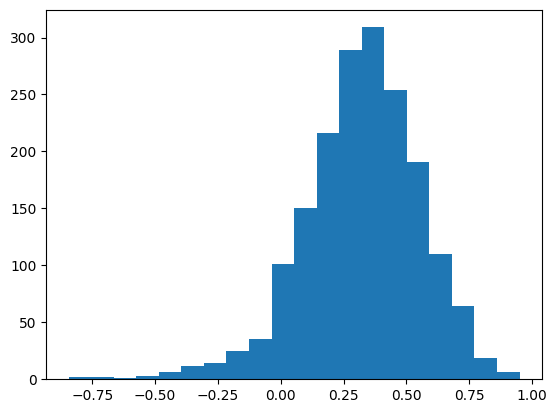

In [38]:
import matplotlib.pyplot as plt

# Convert the dataframe column to a list
data = full_data_df.select('weighted_avg_sentiment_score').rdd.flatMap(lambda x: x).collect()

# Plot the histogram
plt.hist(data, bins=20)
plt.show()


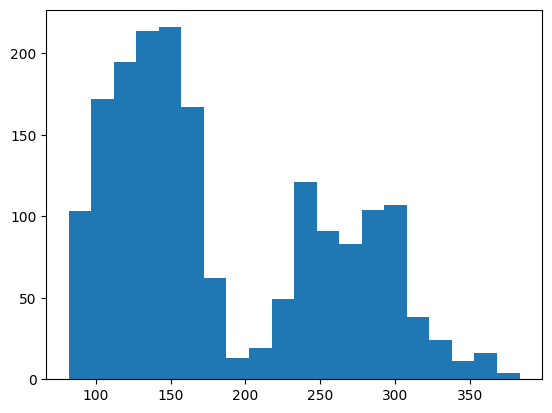

In [39]:
import matplotlib.pyplot as plt

# Convert the dataframe column to a list
data = full_data_df.select('next_day_stock_price').rdd.flatMap(lambda x: x).collect()

# Plot the histogram
plt.hist(data, bins=20)
plt.show()


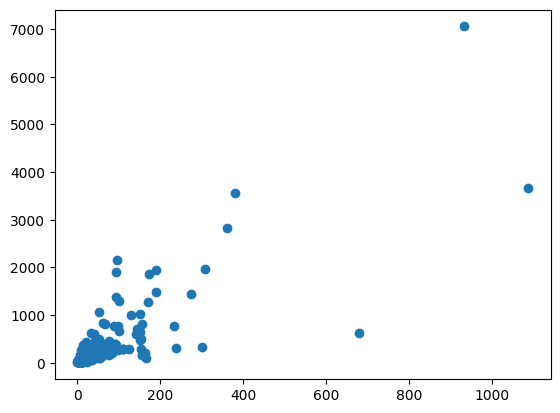

In [40]:
import matplotlib.pyplot as plt

# Convert the dataframe columns to lists
x = full_data_df.select('daywise_avg_retweetCount').rdd.flatMap(lambda x: x).collect()
y = full_data_df.select('daywise_avg_likeCount').rdd.flatMap(lambda x: x).collect()

# Plot the scatter plot
plt.scatter(x, y)
plt.show()


In [41]:
company_1=full_data_df.filter(col('company')==1)
company_2=full_data_df.filter(col('company')==2)
company_3=full_data_df.filter(col('company')==3)
company_4=full_data_df.filter(col('company')==4)
company_5=full_data_df.filter(col('company')==5)

In [42]:
company_1_date=full_data_df.filter(col('company')==1).select('date').rdd.flatMap(lambda x: x).collect()
company_2_date=full_data_df.filter(col('company')==2).select('date').rdd.flatMap(lambda x: x).collect()
company_3_date=full_data_df.filter(col('company')==3).select('date').rdd.flatMap(lambda x: x).collect()
company_4_date=full_data_df.filter(col('company')==4).select('date').rdd.flatMap(lambda x: x).collect()
company_5_date=full_data_df.filter(col('company')==5).select('date').rdd.flatMap(lambda x: x).collect()

company_1_stock_price=full_data_df.filter(col('company')==1).select('stock_price').rdd.flatMap(lambda x: x).collect()
company_2_stock_price=full_data_df.filter(col('company')==2).select('stock_price').rdd.flatMap(lambda x: x).collect()
company_3_stock_price=full_data_df.filter(col('company')==3).select('stock_price').rdd.flatMap(lambda x: x).collect()
company_4_stock_price=full_data_df.filter(col('company')==4).select('stock_price').rdd.flatMap(lambda x: x).collect()
company_5_stock_price=full_data_df.filter(col('company')==5).select('stock_price').rdd.flatMap(lambda x: x).collect()


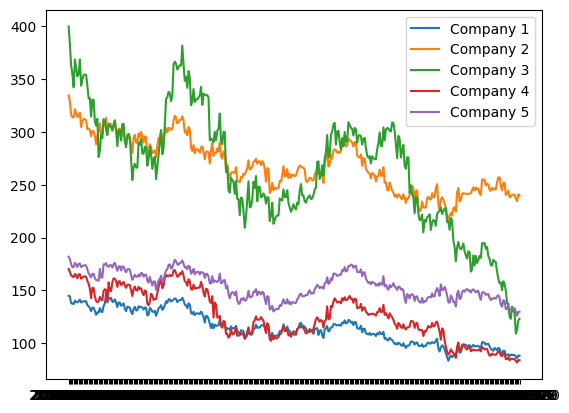

In [43]:
import matplotlib.pyplot as plt

# Plot the line plot
plt.plot(company_1_date, company_1_stock_price, label='Company 1')
plt.plot(company_2_date, company_2_stock_price, label='Company 2')
plt.plot(company_3_date, company_3_stock_price, label='Company 3')
plt.plot(company_4_date, company_4_stock_price, label='Company 4')
plt.plot(company_5_date, company_5_stock_price, label='Company 5')

plt.legend()
plt.show()


In [44]:
company_1_sen_score=full_data_df.filter(col('company')==1).select('weighted_avg_sentiment_score').rdd.flatMap(lambda x: x).collect()
company_2_sen_score=full_data_df.filter(col('company')==2).select('weighted_avg_sentiment_score').rdd.flatMap(lambda x: x).collect()
company_3_sen_score=full_data_df.filter(col('company')==3).select('weighted_avg_sentiment_score').rdd.flatMap(lambda x: x).collect()
company_4_sen_score=full_data_df.filter(col('company')==4).select('weighted_avg_sentiment_score').rdd.flatMap(lambda x: x).collect()
company_5_sen_score=full_data_df.filter(col('company')==5).select('weighted_avg_sentiment_score').rdd.flatMap(lambda x: x).collect()

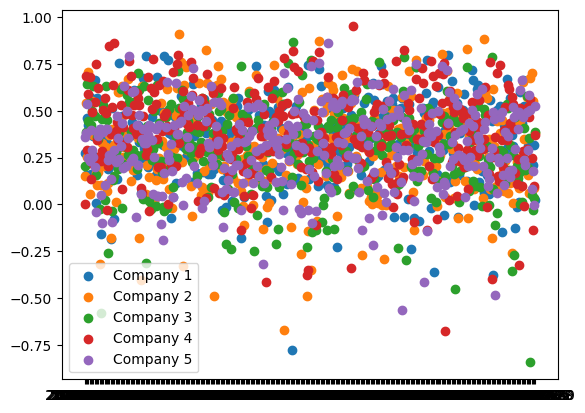

In [45]:
plt.scatter(company_1_date, company_1_sen_score, label='Company 1')
plt.scatter(company_2_date, company_2_sen_score, label='Company 2')
plt.scatter(company_3_date, company_3_sen_score, label='Company 3')
plt.scatter(company_4_date, company_4_sen_score, label='Company 4')
plt.scatter(company_5_date, company_5_sen_score, label='Company 5')
plt.plot()
plt.legend()
plt.show()

In [46]:
company_1_trend=full_data_df.filter(col('company')==1).select('trend').rdd.flatMap(lambda x: x).collect()
company_2_trend=full_data_df.filter(col('company')==2).select('trend').rdd.flatMap(lambda x: x).collect()
company_3_trend=full_data_df.filter(col('company')==3).select('trend').rdd.flatMap(lambda x: x).collect()
company_4_trend=full_data_df.filter(col('company')==4).select('trend').rdd.flatMap(lambda x: x).collect()
company_5_trend=full_data_df.filter(col('company')==5).select('trend').rdd.flatMap(lambda x: x).collect()

In [47]:
full_data_df.groupBy('company').avg('weighted_avg_sentiment_score').show()

+-------+---------------------------------+
|company|avg(weighted_avg_sentiment_score)|
+-------+---------------------------------+
|      1|              0.33156520717106963|
|      3|               0.2930648025215452|
|      2|              0.29828924775995624|
|      5|                 0.31211831950199|
|      4|               0.3820063783245936|
+-------+---------------------------------+



In [48]:
from pyspark.sql.functions import avg, round as r, window

# Define window specification
window = window("date", "7 days")

# Group data by every 7 days and calculate mean of columns
company_1_week = company_1.groupBy(window.alias("week")).agg(avg('weighted_avg_sentiment_score').alias('mean_weighted_avg_sentiment_score'),
                                                avg('daywise_median_positive_score').alias('mean_daywise_median_positive_score'),
                                                avg('daywise_median_negative_score').alias('mean_daywise_median_negative_score'),
                                                avg('daywise_positive_tweet_count').alias('mean_daywise_positive_tweet_count'),
                                                avg('daywise_negative_tweet_count').alias('mean_daywise_negative_tweet_count'),
                                                avg('daywise_avg_replyCount').alias('mean_daywise_avg_replyCount'),
                                                avg('daywise_avg_retweetCount').alias('mean_daywise_avg_retweetCount'),
                                                avg('daywise_avg_likeCount').alias('mean_daywise_avg_likeCount'),
                                                avg('daywise_avg_quoteCount').alias('mean_daywise_avg_quoteCount'),
                                                r(avg('trend')).cast("int").alias('mean_trend')).orderBy('week')



In [49]:
company_1_week.show()

+--------------------+---------------------------------+----------------------------------+----------------------------------+---------------------------------+---------------------------------+---------------------------+-----------------------------+--------------------------+---------------------------+----------+
|                week|mean_weighted_avg_sentiment_score|mean_daywise_median_positive_score|mean_daywise_median_negative_score|mean_daywise_positive_tweet_count|mean_daywise_negative_tweet_count|mean_daywise_avg_replyCount|mean_daywise_avg_retweetCount|mean_daywise_avg_likeCount|mean_daywise_avg_quoteCount|mean_trend|
+--------------------+---------------------------------+----------------------------------+----------------------------------+---------------------------------+---------------------------------+---------------------------+-----------------------------+--------------------------+---------------------------+----------+
|{2021-12-30 00:00...|               0.2984

In [50]:
company_1_week_trend=company_1_week.select('mean_trend').rdd.flatMap(lambda x: x).collect()
company_1_week_sen_score=company_1_week.select('mean_weighted_avg_sentiment_score').rdd.flatMap(lambda x: x).collect()

In [51]:
data = full_data_df.select("weighted_avg_sentiment_score", "date",'company').collect()
nested_list = [[row.weighted_avg_sentiment_score, row.date,row.company] for row in data]
len(nested_list)

1809

In [52]:
positive_values=list(filter(lambda x: x[0] > 0, nested_list))
negative_values=list(filter(lambda x: x[0]<=0, nested_list))
len(positive_values),len(negative_values)

(1669, 140)

In [53]:
positive_values[-1][0]=int(round(positive_values[-1][0],0))
negative_values[-1][0]=int(round(negative_values[-1][0],0))
positive_values[-1],negative_values[-1]

([1, '2022-12-30', 5], [0, '2022-12-29', 5])

In [54]:

result=[]
for i in range(len(positive_values)-1):
    if positive_values[i+1][0] - positive_values[i][0] < 0:
        result.append([0,positive_values[i+1][1],positive_values[i+1][2]])
    else:
        result.append([1,positive_values[i+1][1],positive_values[i+1][2]])

print(len(result))  

result1=[]
for i in range(len(negative_values)-1):
    if negative_values[i+1][0] - negative_values[i][0] < 0:
        result1.append([0,negative_values[i+1][1],negative_values[i+1][2]])
    else:
        result1.append([1,negative_values[i+1][1],negative_values[i+1][2]])

print(len(result1))  

result.append(positive_values[-1])
result1.append(negative_values[-1])
full=result+result1
len(result),len(result1),len(full)

1668
139


(1669, 140, 1809)

In [55]:
print(full[-1])
full.sort(key=lambda x: x[1])

[0, '2022-12-29', 5]


In [56]:
from pyspark.sql import  Row
# convert the list to a list of Rows
rows = [Row(sent_trend=name, date=age,company=c) for name, age,c in full]

# create a PySpark DataFrame from the list of Rows
df_rd = spark.createDataFrame(rows)

# show the DataFrame
df_rd.show()

+----------+----------+-------+
|sent_trend|      date|company|
+----------+----------+-------+
|         1|2022-01-03|      2|
|         0|2022-01-03|      3|
|         0|2022-01-03|      4|
|         0|2022-01-03|      5|
|         0|2022-01-04|      1|
|         1|2022-01-04|      2|
|         1|2022-01-04|      3|
|         1|2022-01-04|      4|
|         1|2022-01-04|      5|
|         1|2022-01-05|      1|
|         0|2022-01-05|      2|
|         1|2022-01-05|      3|
|         0|2022-01-05|      4|
|         1|2022-01-05|      5|
|         0|2022-01-06|      1|
|         1|2022-01-06|      2|
|         0|2022-01-06|      3|
|         1|2022-01-06|      4|
|         0|2022-01-06|      5|
|         1|2022-01-07|      1|
+----------+----------+-------+
only showing top 20 rows



In [57]:
df_rdp=df_rd.toPandas()
df_rdp.dtypes,df.dtypes

(sent_trend     int64
 date          object
 company        int64
 dtype: object,
 date                              object
 weighted_avg_sentiment_score     float64
 daywise_median_positive_score    float64
 daywise_median_negative_score    float64
 daywise_positive_tweet_count       int64
 daywise_negative_tweet_count       int64
 daywise_avg_replyCount             int64
 daywise_avg_retweetCount           int64
 daywise_avg_likeCount              int64
 daywise_avg_quoteCount             int64
 company                            int64
 stock_price                      float64
 next_day_stock_price             float64
 trend                              int64
 dtype: object)

In [58]:
joined_df = pd.merge(df, df_rdp, on=["date",'company'], how="inner")
joined_df.isna()

,date,weighted_avg_sentiment_score,daywise_median_positive_score,daywise_median_negative_score,daywise_positive_tweet_count,daywise_negative_tweet_count,daywise_avg_replyCount,daywise_avg_retweetCount,daywise_avg_likeCount,daywise_avg_quoteCount,company,stock_price,next_day_stock_price,trend,sent_trend
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1805,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1806,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1807,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [59]:
full_data_df = full_data_df.join(df_rd, on=["date",'company'], how="inner")

# show the joined DataFrame
full_data_df.count()

1809

In [ ]:
import matplotlib.pyplot as plt

# Convert the dataframe columns to lists
x = full_data_df.select('weighted_avg_sentiment_score').rdd.flatMap(lambda x: x).collect()
y = full_data_df.select('stock_price').rdd.flatMap(lambda x: x).collect()

# Plot the scatter plot
plt.scatter(x, y)
plt.show()


In [60]:
company_1=full_data_df.filter(col('company')==1)
company_2=full_data_df.filter(col('company')==2)
company_3=full_data_df.filter(col('company')==3)
company_4=full_data_df.filter(col('company')==4)
company_5=full_data_df.filter(col('company')==5)

In [61]:
from pyspark.sql.functions import weekofyear,window, avg, round as r1

# Define window specification
window = window("date", "7 days")

# Group data by every 7 days and calculate mean of columns
company_1_week = company_1.groupBy(window.alias("week")).agg(avg('weighted_avg_sentiment_score').alias('mean_weighted_avg_sentiment_score'),
                                                avg('daywise_median_positive_score').alias('mean_daywise_median_positive_score'),
                                                avg('daywise_median_negative_score').alias('mean_daywise_median_negative_score'),
                                                avg('daywise_positive_tweet_count').alias('mean_daywise_positive_tweet_count'),
                                                avg('daywise_negative_tweet_count').alias('mean_daywise_negative_tweet_count'),
                                                avg('daywise_avg_replyCount').alias('mean_daywise_avg_replyCount'),
                                                avg('daywise_avg_retweetCount').alias('mean_daywise_avg_retweetCount'),
                                                avg('daywise_avg_likeCount').alias('mean_daywise_avg_likeCount'),
                                                avg('daywise_avg_quoteCount').alias('mean_daywise_avg_quoteCount'),
                                                r1(avg('trend')).cast("int").alias('sent_trend'),
                                                r1(avg('sent_trend')).cast("int").alias('trend')).orderBy('week')

company_2_week = company_2.groupBy(window.alias("week")).agg(avg('weighted_avg_sentiment_score').alias('mean_weighted_avg_sentiment_score'),
                                                avg('daywise_median_positive_score').alias('mean_daywise_median_positive_score'),
                                                avg('daywise_median_negative_score').alias('mean_daywise_median_negative_score'),
                                                avg('daywise_positive_tweet_count').alias('mean_daywise_positive_tweet_count'),
                                                avg('daywise_negative_tweet_count').alias('mean_daywise_negative_tweet_count'),
                                                avg('daywise_avg_replyCount').alias('mean_daywise_avg_replyCount'),
                                                avg('daywise_avg_retweetCount').alias('mean_daywise_avg_retweetCount'),
                                                avg('daywise_avg_likeCount').alias('mean_daywise_avg_likeCount'),
                                                avg('daywise_avg_quoteCount').alias('mean_daywise_avg_quoteCount'),
                                                r1(avg('trend')).cast("int").alias('sent_trend'),
                                                r1(avg('sent_trend')).cast("int").alias('trend')).orderBy('week')    


company_3_week = company_3.groupBy(window.alias("week")).agg(avg('weighted_avg_sentiment_score').alias('mean_weighted_avg_sentiment_score'),
                                                avg('daywise_median_positive_score').alias('mean_daywise_median_positive_score'),
                                                avg('daywise_median_negative_score').alias('mean_daywise_median_negative_score'),
                                                avg('daywise_positive_tweet_count').alias('mean_daywise_positive_tweet_count'),
                                                avg('daywise_negative_tweet_count').alias('mean_daywise_negative_tweet_count'),
                                                avg('daywise_avg_replyCount').alias('mean_daywise_avg_replyCount'),
                                                avg('daywise_avg_retweetCount').alias('mean_daywise_avg_retweetCount'),
                                                avg('daywise_avg_likeCount').alias('mean_daywise_avg_likeCount'),
                                                avg('daywise_avg_quoteCount').alias('mean_daywise_avg_quoteCount'),
                                                r1(avg('trend')).cast("int").alias('sent_trend'),
                                                r1(avg('sent_trend')).cast("int").alias('trend')).orderBy('week')     


company_4_week = company_4.groupBy(window.alias("week")).agg(avg('weighted_avg_sentiment_score').alias('mean_weighted_avg_sentiment_score'),
                                                avg('daywise_median_positive_score').alias('mean_daywise_median_positive_score'),
                                                avg('daywise_median_negative_score').alias('mean_daywise_median_negative_score'),
                                                avg('daywise_positive_tweet_count').alias('mean_daywise_positive_tweet_count'),
                                                avg('daywise_negative_tweet_count').alias('mean_daywise_negative_tweet_count'),
                                                avg('daywise_avg_replyCount').alias('mean_daywise_avg_replyCount'),
                                                avg('daywise_avg_retweetCount').alias('mean_daywise_avg_retweetCount'),
                                                avg('daywise_avg_likeCount').alias('mean_daywise_avg_likeCount'),
                                                avg('daywise_avg_quoteCount').alias('mean_daywise_avg_quoteCount'),
                                                r1(avg('trend')).cast("int").alias('sent_trend'),
                                                r1(avg('sent_trend')).cast("int").alias('trend')).orderBy('week')    


company_5_week = company_5.groupBy(window.alias("week")).agg(avg('weighted_avg_sentiment_score').alias('mean_weighted_avg_sentiment_score'),
                                                avg('daywise_median_positive_score').alias('mean_daywise_median_positive_score'),
                                                avg('daywise_median_negative_score').alias('mean_daywise_median_negative_score'),
                                                avg('daywise_positive_tweet_count').alias('mean_daywise_positive_tweet_count'),
                                                avg('daywise_negative_tweet_count').alias('mean_daywise_negative_tweet_count'),
                                                avg('daywise_avg_replyCount').alias('mean_daywise_avg_replyCount'),
                                                avg('daywise_avg_retweetCount').alias('mean_daywise_avg_retweetCount'),
                                                avg('daywise_avg_likeCount').alias('mean_daywise_avg_likeCount'),
                                                avg('daywise_avg_quoteCount').alias('mean_daywise_avg_quoteCount'),
                                                r1(avg('trend')).cast("int").alias('sent_trend'),
                                                r1(avg('sent_trend')).cast("int").alias('trend')).orderBy('week')                                  



In [62]:
company_1_trend=company_1_week.select('trend').rdd.flatMap(lambda x: x).collect()
company_1_sen_trend=company_1_week.select('sent_trend').rdd.flatMap(lambda x: x).collect()
company_1_date=company_1_week.select('week').rdd.flatMap(lambda x: x).collect()
company_1_date = [company_1_date[i][0] for i in range(len(company_1_date))]

company_2_trend=company_2_week.select('trend').rdd.flatMap(lambda x: x).collect()
company_2_sen_trend=company_2_week.select('sent_trend').rdd.flatMap(lambda x: x).collect()
company_2_date=company_2_week.select('week').rdd.flatMap(lambda x: x).collect()
company_2_date = [company_2_date[i][0] for i in range(len(company_2_date))]

company_3_trend=company_3_week.select('trend').rdd.flatMap(lambda x: x).collect()
company_3_sen_trend=company_3_week.select('sent_trend').rdd.flatMap(lambda x: x).collect()
company_3_date=company_3_week.select('week').rdd.flatMap(lambda x: x).collect()
company_3_date = [company_3_date[i][0] for i in range(len(company_3_date))]

company_4_trend=company_4_week.select('trend').rdd.flatMap(lambda x: x).collect()
company_4_sen_trend=company_4_week.select('sent_trend').rdd.flatMap(lambda x: x).collect()
company_4_date=company_4_week.select('week').rdd.flatMap(lambda x: x).collect()
company_4_date = [company_4_date[i][0] for i in range(len(company_4_date))]

company_5_trend=company_5_week.select('trend').rdd.flatMap(lambda x: x).collect()
company_5_sen_trend=company_5_week.select('sent_trend').rdd.flatMap(lambda x: x).collect()
company_5_date=company_5_week.select('week').rdd.flatMap(lambda x: x).collect()
company_5_date = [company_5_date[i][0] for i in range(len(company_5_date))]

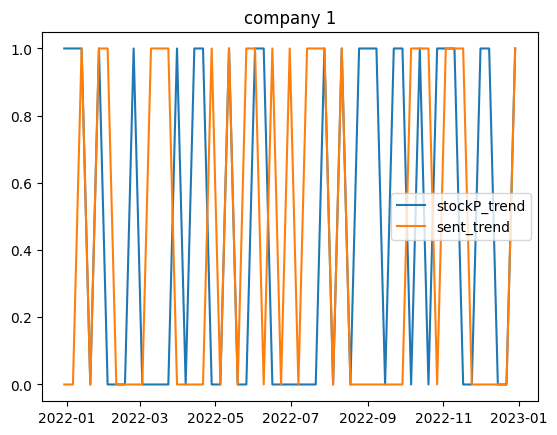

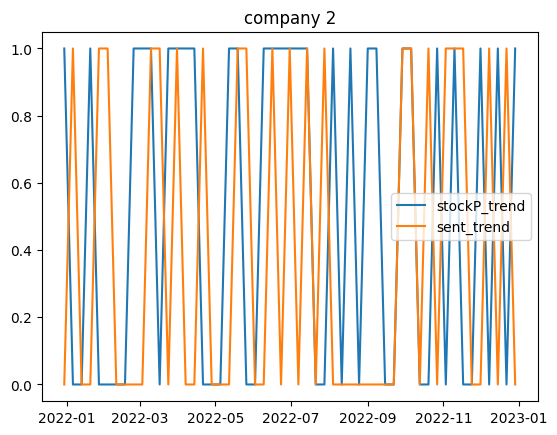

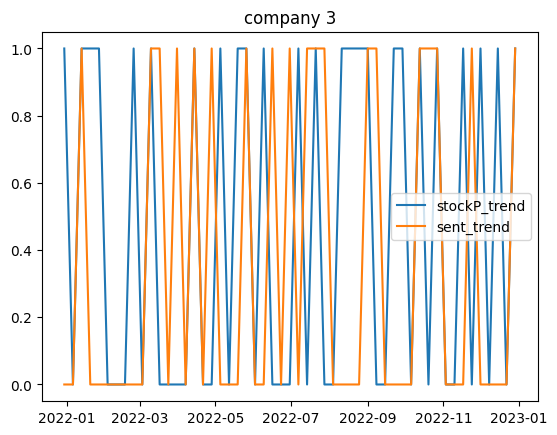

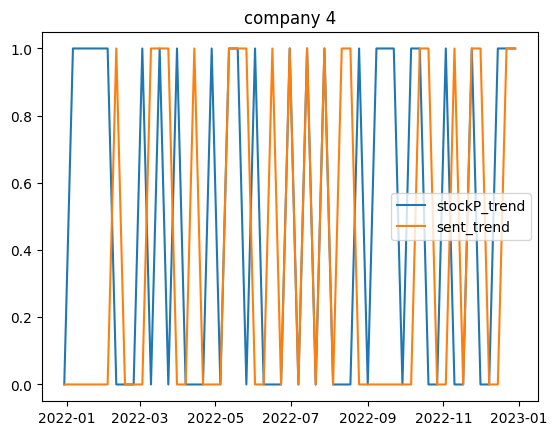

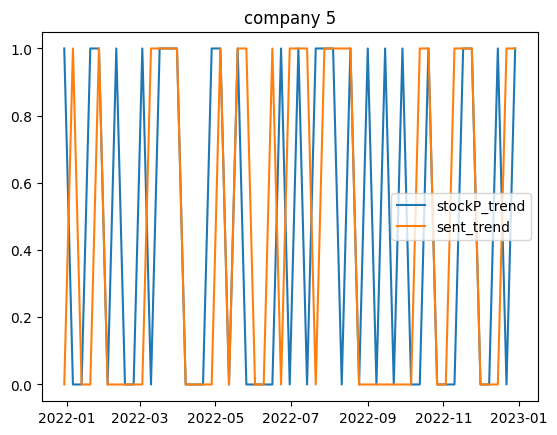

In [64]:
for i in range(1,6):
  plt.plot(eval("company_"+str(i)+"_date"), eval("company_"+str(i)+"_trend"),label='stockP_trend')
  plt.plot(eval("company_"+str(i)+"_date"),eval("company_"+str(i)+"_sen_trend"),label='sent_trend')
  plt.title('company '+str(i))
  plt.legend()
  plt.show()

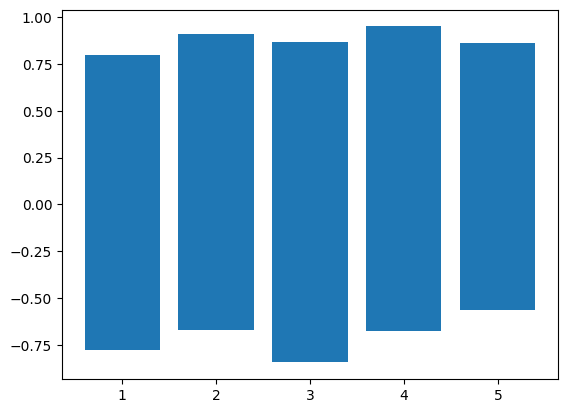

In [65]:
import matplotlib.pyplot as plt

# Convert the dataframe columns to lists
x = full_data_df.select('company').rdd.flatMap(lambda x: x).collect()
y = full_data_df.select('weighted_avg_sentiment_score').rdd.flatMap(lambda x: x).collect()

# Plot the bar chart
plt.bar(x, y)
plt.show()

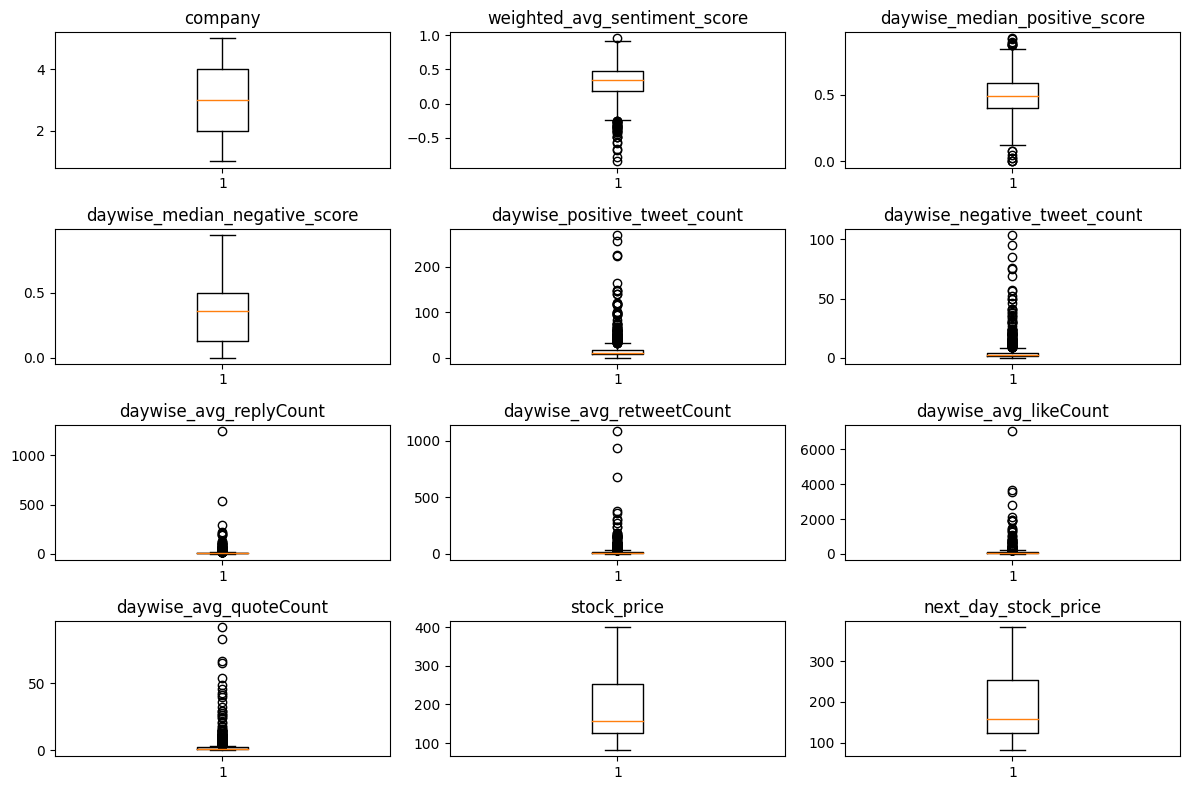

In [66]:
cols=full_data_df.columns[1:-1]

# Convert selected columns to Pandas DataFrame
pandas_df = full_data_df.toPandas()

# Create subplots
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12, 8))

# Create boxplots for each group in each subplot
for i, ax in zip(cols, axs.flatten()):
    ax.boxplot(pandas_df[i])
    ax.set_title('{}'.format(i))

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


<Axes: >

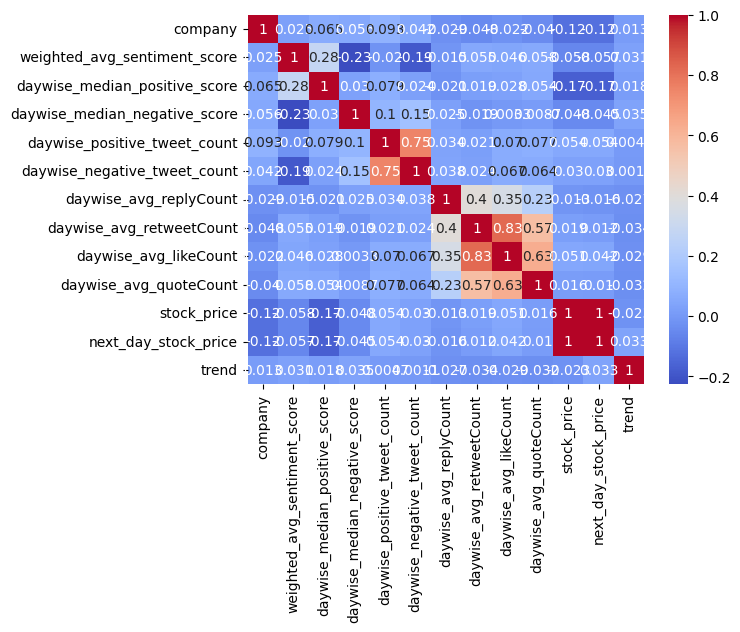

In [67]:
import seaborn as sns

# Compute correlation matrix
corr = pandas_df[cols].corr()

# Create heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')